


### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mean, stdev
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### Loading our cleaned datasets, with index_col set to 'id' to prevent problems with scaling later

In [2]:
train = pd.read_csv('../datasets/train_filled_encoded.csv', keep_default_na=False, na_values='', index_col='id')
test_df = pd.read_csv('../datasets/test_filled_encoded.csv', keep_default_na=False, na_values='', index_col='id')

In [3]:
#changing settings to see all columns
pd.set_option('max_columns', 230)
pd.set_option('max_rows', 230)

In [4]:
train.head()

,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Grvl,alley_NA,alley_Pave,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exter_cond_Ex,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,misc_feature_Elev,misc_feature_Gar2,misc_feature_NA,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,pid,ms_subclass,lot_frontage,lot_area,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109.0,

### Split our training set into X and y, and creating a train test split

In [5]:
X = train.drop(columns='saleprice')
y = train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)  

### Creating functions to return regression metrics

In [6]:
def lr_reg_metrics(X, y):
    
    y_preds = lr.predict(X)
    
    MAE = metrics.mean_absolute_error(y, y_preds) 
    MSE = metrics.mean_squared_error(y, y_preds)
    RMSE = np.sqrt(metrics.mean_squared_error(y, y_preds))
    R2 = metrics.r2_score(y, y_preds)
    CV_score = cross_val_score(lr, X, y, cv=5).mean()
    
    print(f'MAE = {MAE} \nMSE = {MSE} \nRMSE = {RMSE} \nR2 = {R2} \nCV_score = {CV_score}')
    
def ridge_reg_metrics(X, y):
    
    y_preds = ridge.predict(X)
    
    MAE = metrics.mean_absolute_error(y, y_preds) 
    MSE = metrics.mean_squared_error(y, y_preds)
    RMSE = np.sqrt(metrics.mean_squared_error(y, y_preds))
    R2 = metrics.r2_score(y, y_preds)
    CV_score = cross_val_score(ridge, X, y, cv=5).mean()
    
    print(f'MAE = {MAE} \nMSE = {MSE} \nRMSE = {RMSE} \nR2 = {R2} \nCV_score = {CV_score}')
    
def lasso_reg_metrics(X, y):
    
    y_preds = lasso.predict(X)
    
    MAE = metrics.mean_absolute_error(y, y_preds) 
    MSE = metrics.mean_squared_error(y, y_preds)
    RMSE = np.sqrt(metrics.mean_squared_error(y, y_preds))
    R2 = metrics.r2_score(y, y_preds)
    CV_score = cross_val_score(lasso, X, y, cv=5).mean()
    
    print(f'MAE = {MAE} \nMSE = {MSE} \nRMSE = {RMSE} \nR2 = {R2} \nCV_score = {CV_score}')
    
def elasticnet_reg_metrics(X, y):
    
    y_preds = elasticnet.predict(X)
    
    MAE = metrics.mean_absolute_error(y, y_preds) 
    MSE = metrics.mean_squared_error(y, y_preds)
    RMSE = np.sqrt(metrics.mean_squared_error(y, y_preds))
    R2 = metrics.r2_score(y, y_preds)
    CV_score = cross_val_score(elasticnet, X, y, cv=5).mean()
    
    print(f'MAE = {MAE} \nMSE = {MSE} \nRMSE = {RMSE} \nR2 = {R2} \nCV_score = {CV_score}')
    
def knn_reg_metrics(X, y):
    
    y_preds = knn.predict(X)
    
    MAE = metrics.mean_absolute_error(y, y_preds) 
    MSE = metrics.mean_squared_error(y, y_preds)
    RMSE = np.sqrt(metrics.mean_squared_error(y, y_preds))
    R2 = metrics.r2_score(y, y_preds)
    CV_score = cross_val_score(elasticnet, X, y, cv=5).mean()
    
    print(f'MAE = {MAE} \nMSE = {MSE} \nRMSE = {RMSE} \nR2 = {R2} \nCV_score = {CV_score}')

### Creating functions predictions

In [7]:
def reg_plots(model, X_train, y_train, X_test, y_test):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    plt.scatter(y_train_preds, y_train, label='Training data') 
    plt.scatter(y_test_preds, y_test, label='Validation data')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.legend(loc='upper left')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])

## Initial Modeling

#### Linear Regression

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
lr_reg_metrics(X_train, y_train)

MAE = 14473.468243815827 
MSE = 430200313.78244966 
RMSE = 20741.270785138735 
R2 = 0.9323914815467349 
CV_score = 0.8054286885797325


In [10]:
lr_reg_metrics(X_test, y_test)

MAE = 17200.23056768486 
MSE = 569009296.6807805 
RMSE = 23853.91575152349 
R2 = 0.9042316228463458 
CV_score = 0.8396784243401549


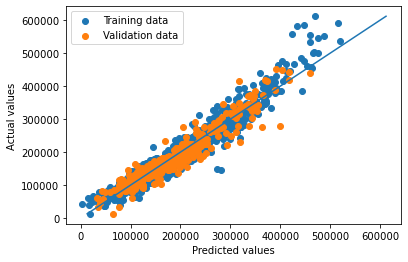

In [11]:
reg_plots(lr, X_train, y_train, X_test, y_test)

#### Ridge

In [12]:
ridge = Ridge()
ridge.fit(X_train, y_train);

In [13]:
ridge_reg_metrics(X_train, y_train)

MAE = 15223.678547682686 
MSE = 510423429.6335145 
RMSE = 22592.552525854942 
R2 = 0.9197839453952437 
CV_score = 0.8168663953199109


In [14]:
ridge_reg_metrics(X_test, y_test)

MAE = 17111.76911682756 
MSE = 562531047.672804 
RMSE = 23717.73698464514 
R2 = 0.9053219589760194 
CV_score = 0.8841162158925515


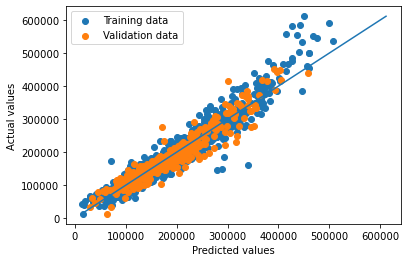

In [15]:
reg_plots(ridge, X_train, y_train, X_test, y_test)

#### Lasso

In [16]:
lasso = Lasso()
lasso.fit(X_train, y_train);

In [17]:
lasso_reg_metrics(X_train, y_train)

MAE = 14477.706783221562 
MSE = 430308185.364562 
RMSE = 20743.871031332652 
R2 = 0.9323745288909228 
CV_score = 0.8105846880011562


In [18]:
lasso_reg_metrics(X_test, y_test)

MAE = 17133.584375089365 
MSE = 564594127.0270714 
RMSE = 23761.189512039826 
R2 = 0.9049747278097626 
CV_score = 0.8331661275541075


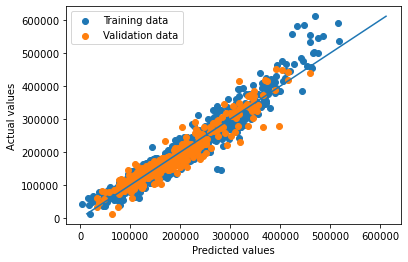

In [19]:
reg_plots(lasso, X_train, y_train, X_test, y_test)

#### Elasticnet

In [20]:
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train);

In [21]:
elasticnet_reg_metrics(X_train, y_train)

MAE = 18714.849743190447 
MSE = 931114229.4985926 
RMSE = 30514.164407674554 
R2 = 0.8536699031814573 
CV_score = 0.7942292284234072


In [22]:
elasticnet_reg_metrics(X_test, y_test)

MAE = 18971.319794464216 
MSE = 670737216.6627154 
RMSE = 25898.594878153435 
R2 = 0.8871100786734881 
CV_score = 0.8874161407999533


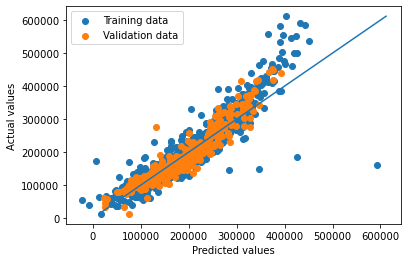

In [23]:
reg_plots(elasticnet, X_train, y_train, X_test, y_test)

#### K Nearest Neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
knn_reg_metrics(X_train, y_train)

MAE = 36001.321341463416 
MSE = 3414891809.787195 
RMSE = 58437.07564369726 
R2 = 0.4633295966058868 
CV_score = 0.7942292284234072


In [26]:
knn_reg_metrics(X_test, y_test)

MAE = 42942.76885644769 
MSE = 4171566502.7980537 
RMSE = 64587.665252724946 
R2 = 0.29789520752656606 
CV_score = 0.8874161407999533


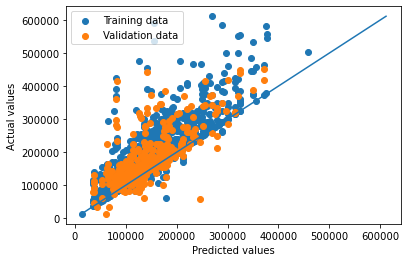

In [27]:
reg_plots(knn, X_train, y_train, X_test, y_test)

#### Observations

All of our models are performing well, with the LR, Lasso, and Ridge models having an R2 score above .9 on the test set, with Elasticnet just under .9

## Modifying the dataset to improve models

### Scaling to improve our models
##### First, scaling the X train/test from our training set, then scaling the full train and test sets

In [28]:
ss = StandardScaler()
ss.fit(X_train);

In [29]:
X_train_scaled = ss.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [30]:
X_test_scaled = ss.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [31]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((1640, 228), (1640,), (411, 228), (411,))

#### Also scaling the full train set and the test set, which will be used later to fit our submission model

In [32]:
ss.fit(X)

X_full_scaled = ss.transform(X)
X_full_scaled = pd.DataFrame(X_full_scaled, index=X.index, columns = X.columns)

test_df_scaled = ss.transform(test_df)
test_df_scaled = pd.DataFrame(test_df_scaled, index=test_df.index, columns = test_df.columns)

In [33]:
X_full_scaled.shape, test_df_scaled.shape

((2051, 228), (878, 228))

### Model Testing after scaling

In [34]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
lr_reg_metrics(X_train_scaled, y_train)

MAE = 14523.212436782875 
MSE = 432794527.9190621 
RMSE = 20803.714281807035 
R2 = 0.9319837854835108 
CV_score = -3.0918932671394216e+25


In [36]:
lr_reg_metrics(X_test_scaled, y_test)

MAE = 3331484104475217.5 
MSE = 4.0353497784022976e+33 
RMSE = 6.352440301492252e+16 
R2 = -6.791785332494363e+23 
CV_score = -2.1545011481853075e+25


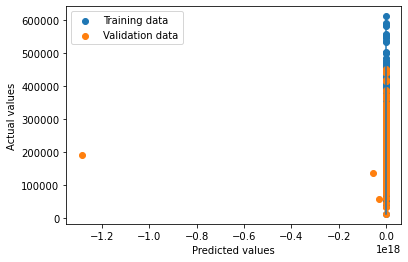

In [37]:
reg_plots(lr, X_train_scaled, y_train, X_test_scaled, y_test)

#### Ridge

In [38]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train);

In [39]:
ridge_reg_metrics(X_train_scaled, y_train)

MAE = 14470.527735587782 
MSE = 430204427.4693226 
RMSE = 20741.369951604513 
R2 = 0.932390835056563 
CV_score = 0.8132840459119093


In [40]:
ridge_reg_metrics(X_test_scaled, y_test)

MAE = 17171.365389389015 
MSE = 568139081.2913066 
RMSE = 23835.66825770376 
R2 = 0.9043780863858877 
CV_score = 0.8571908246352553


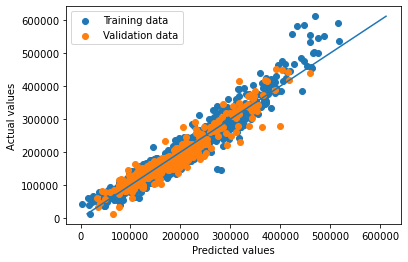

In [41]:
reg_plots(ridge, X_train_scaled, y_train, X_test_scaled, y_test)

#### Lasso

In [42]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train);

In [43]:
lasso_reg_metrics(X_train_scaled, y_train)

MAE = 14473.007300058765 
MSE = 430201389.66100544 
RMSE = 20741.296720817758 
R2 = 0.9323913124660698 
CV_score = 0.8121345857197848


In [44]:
lasso_reg_metrics(X_test_scaled, y_test)

MAE = 17178.088927339963 
MSE = 568193581.5944579 
RMSE = 23836.811481287885 
R2 = 0.9043689135909656 
CV_score = 0.8353159388862326


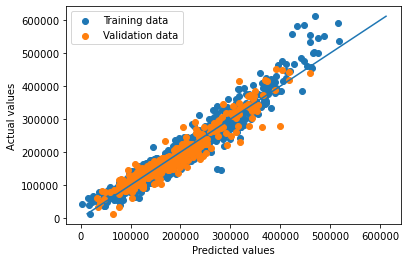

In [45]:
reg_plots(lasso, X_train_scaled, y_train, X_test_scaled, y_test)

#### Elasticnet

In [46]:
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train);

In [47]:
elasticnet_reg_metrics(X_train_scaled, y_train)

MAE = 15540.830092246004 
MSE = 569173652.3502282 
RMSE = 23857.3605486908 
R2 = 0.9105510011378273 
CV_score = 0.8501508681900706


In [48]:
elasticnet_reg_metrics(X_test_scaled, y_test)

MAE = 17856.192970346754 
MSE = 623259276.6582495 
RMSE = 24965.161258406675 
R2 = 0.8951009591236843 
CV_score = 0.8923086752748413


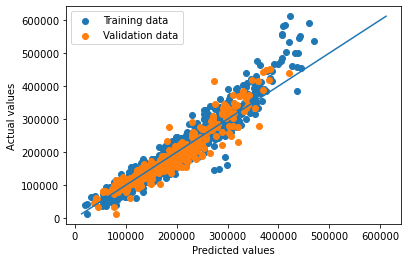

In [49]:
reg_plots(elasticnet, X_train_scaled, y_train, X_test_scaled, y_test)

#### K Nearest Neighbors

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.1823170731707317, 0.0072992700729927005)

In [51]:
knn_reg_metrics(X_train_scaled, y_train)

MAE = 36009.89512195122 
MSE = 3218414306.0414634 
RMSE = 56731.070023766195 
R2 = 0.494207195975473 
CV_score = 0.8501508681900706


In [52]:
knn_reg_metrics(X_test_scaled, y_test)

MAE = 40338.720194647205 
MSE = 3459616813.357664 
RMSE = 58818.50740504781 
R2 = 0.4177214858852569 
CV_score = 0.8923086752748413


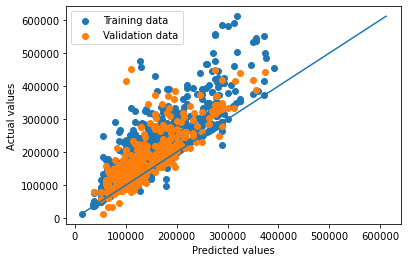

In [53]:
reg_plots(knn, X_train_scaled, y_train, X_test_scaled, y_test)

### Observations

After scaling, the the only model with a significant change in R2 score is KNN

### Recursive Feature Elimination

In [54]:
X_train_scaled.head()

,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Grvl,alley_NA,alley_Pave,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exter_cond_Ex,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,misc_feature_Elev,misc_feature_Gar2,misc_feature_NA,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,pid,ms_subclass,lot_frontage,lot_area,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
452.0,-0.034943,-

In [55]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=.8)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=0.8)

In [56]:
X_train_rfe = rfe.transform(X_train_scaled)
X_train_rfe = pd.DataFrame(X_train_rfe, index=X_train_scaled.index, columns=rfe.get_feature_names_out())

In [57]:
X_test_rfe = rfe.transform(X_test_scaled)
X_test_rfe = pd.DataFrame(X_test_rfe, index=X_test_scaled.index, columns=rfe.get_feature_names_out())

In [58]:
X_test_rfe.shape, X_train_rfe.shape

((411, 182), (1640, 182))

In [105]:
X_test.shape

(411, 228)

In [59]:
rfe.score(X_train, y_train), rfe.score(X_test, y_test)

(-2.4078597970606843e+29, -2.6027588138499172e+29)

#### Fitting RFe to the full train set and the test set, which will be used later to fit our submission model

In [60]:
X_full_rfe = rfe.transform(X_full_scaled)
X_full_rfe = pd.DataFrame(X_full_rfe, index=X_full_scaled.index, columns=rfe.get_feature_names_out())

In [61]:
test_df_rfe = rfe.transform(test_df_scaled)
test_df_rfe = pd.DataFrame(test_df_rfe, index=test_df_scaled.index, columns=rfe.get_feature_names_out())

In [62]:
X_full_rfe.shape, test_df_rfe.shape

((2051, 182), (878, 182))

In [103]:
X_full.shape

NameError: name 'X_full' is not defined

## Running Tests after feature selection

#### Linear Regression

In [63]:
lr = LinearRegression()
lr.fit(X_train_rfe, y_train)

LinearRegression()

In [64]:
lr_reg_metrics(X_train_rfe, y_train)

MAE = 17401.61863320708 
MSE = 601796938.4895383 
RMSE = 24531.549859100593 
R2 = 0.9054240591708089 
CV_score = -2.764266089015466e+26


In [65]:
lr_reg_metrics(X_test_rfe, y_test)

MAE = 6125221603988739.0 
MSE = 1.4514732523032504e+34 
RMSE = 1.2047710372943277e+17 
R2 = -2.442934389049216e+24 
CV_score = -1.1895825812660221e+26


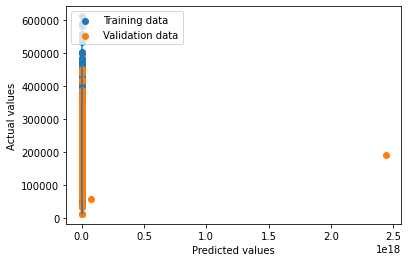

In [66]:
reg_plots(lr, X_train_rfe, y_train, X_test_rfe, y_test)

#### Ridge

In [67]:
ridge = Ridge()
ridge.fit(X_train_rfe, y_train);

In [68]:
ridge_reg_metrics(X_train_rfe, y_train)

MAE = 17156.25148492715 
MSE = 593128627.1429433 
RMSE = 24354.232222407325 
R2 = 0.9067863354613169 
CV_score = 0.7992924049925263


In [69]:
ridge_reg_metrics(X_test_rfe, y_test)

MAE = 19569.243200319874 
MSE = 770669518.1801264 
RMSE = 27760.935109972907 
R2 = 0.8702907500660662 
CV_score = 0.8193431084536792


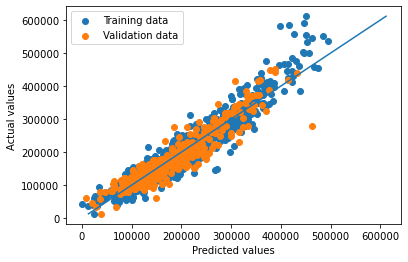

In [70]:
reg_plots(ridge, X_train_rfe, y_train, X_test_rfe, y_test)

#### Lasso

In [71]:
lasso = Lasso()
lasso.fit(X_train_rfe, y_train);

In [72]:
lasso_reg_metrics(X_train_rfe, y_train)

MAE = 17158.154163483618 
MSE = 593124590.2586597 
RMSE = 24354.149343770143 
R2 = 0.9067869698815088 
CV_score = 0.7973262494629088


In [73]:
lasso_reg_metrics(X_test_rfe, y_test)

MAE = 19578.829095039964 
MSE = 770975725.1112397 
RMSE = 27766.449631006835 
R2 = 0.8702392132264452 
CV_score = 0.8121018430981047


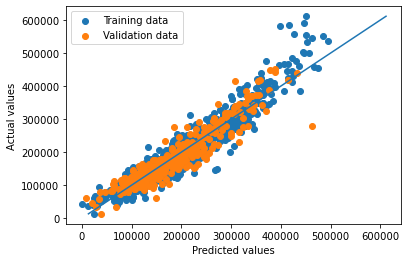

In [74]:
reg_plots(lasso, X_train_rfe, y_train, X_test_rfe, y_test)

#### Elasticnet

In [75]:
elasticnet = ElasticNet()
elasticnet.fit(X_train_rfe, y_train);

In [76]:
elasticnet_reg_metrics(X_train_rfe, y_train)

MAE = 18155.423818741947 
MSE = 771961220.2993045 
RMSE = 27784.19011415133 
R2 = 0.8786817379352183 
CV_score = 0.8193248110747355


In [77]:
elasticnet_reg_metrics(X_test_rfe, y_test)

MAE = 20259.758479098964 
MSE = 849696485.2424339 
RMSE = 29149.5537743279 
R2 = 0.8569899403410217 
CV_score = 0.8534764848687871


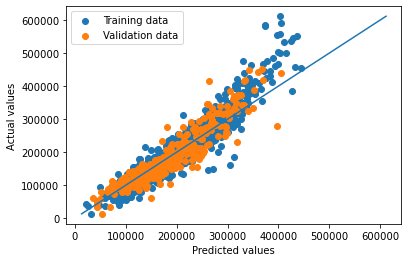

In [78]:
reg_plots(elasticnet, X_train_rfe, y_train, X_test_rfe, y_test)

#### K Nearest Neighbors

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train_rfe, y_train);

In [80]:
knn_reg_metrics(X_train_rfe, y_train)

MAE = 38145.31951219512 
MSE = 3748352684.752439 
RMSE = 61223.79181945887 
R2 = 0.41092425194142324 
CV_score = 0.8193248110747355


In [81]:
knn_reg_metrics(X_test_rfe, y_test)

MAE = 44118.04622871046 
MSE = 4281928786.454988 
RMSE = 65436.44845539058 
R2 = 0.27932043754222735 
CV_score = 0.8534764848687871


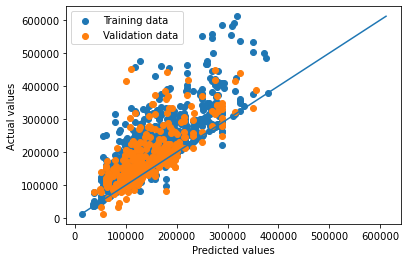

In [82]:
reg_plots(knn, X_train_rfe, y_train, X_test_rfe, y_test)

### Observations

RFE has not seemed to help with the accuracy of our models, so I am going to proceed with the scaled data prior to RFE.  The Lasso model has been the highest performing, so I will use that model going forward

### Adding Polynomial Features

In [83]:
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train_scaled);

In [84]:
X_train_pf = pf.transform(X_train_scaled)
X_train_pf = pd.DataFrame(X_train_pf, index=X_train_scaled.index, columns=pf.get_feature_names_out())

In [85]:
X_test_pf = pf.transform(X_test_scaled)
X_test_pf = pd.DataFrame(X_test_pf, index=X_test_scaled.index, columns=pf.get_feature_names_out())

In [86]:
X_test_pf.shape, X_train_pf.shape

((411, 26334), (1640, 26334))

##### Adding polynomials to the full train and test datasets

In [87]:
X_full_pf = pf.transform(X_full_scaled)
X_full_pf = pd.DataFrame(X_full_pf, index=X_full_scaled.index, columns=pf.get_feature_names_out())

In [88]:
test_df_pf = pf.transform(test_df_scaled)
test_df_pf = pd.DataFrame(test_df_pf, index=test_df_scaled.index, columns=pf.get_feature_names_out())

In [89]:
X_full_pf.shape, test_df_pf.shape

((2051, 26334), (878, 26334))

### Testing model with added polynomials

In [90]:
# lasso = Lasso()
# lasso.fit(X_train_pf, y_train);

In [91]:
# lasso_reg_metrics(X_train_pf, y_train)

In [92]:
# lasso_reg_metrics(X_test_pf, y_test)

### Observations

Running PF increased our number of features by more than 100x and added a lot of bias to the model.  The R2 score on the training set is near 1, while the R2 on the training set dropped from .90 to .73.  Ideally, I would perform feature selection to reduce the number of variables, but I don't currently have the computing power or time to run RFE on this new set.  I will continue with the scaled set.

### Model tuning

In [93]:
lassoCV = LassoCV()
lassoCV.fit(X_train_scaled, y_train);

In [94]:
lassoCV.alpha_

729.4590016143752

In [106]:
lassoCV.alphas_

array([6.34446239e+04, 5.91686686e+04, 5.51808984e+04, 5.14618905e+04,
       4.79935313e+04, 4.47589279e+04, 4.17423260e+04, 3.89290329e+04,
       3.63053464e+04, 3.38584876e+04, 3.15765388e+04, 2.94483858e+04,
       2.74636631e+04, 2.56127042e+04, 2.38864936e+04, 2.22766239e+04,
       2.07752540e+04, 1.93750714e+04, 1.80692565e+04, 1.68514490e+04,
       1.57157178e+04, 1.46565310e+04, 1.36687299e+04, 1.27475032e+04,
       1.18883642e+04, 1.10871282e+04, 1.03398929e+04, 9.64301870e+03,
       8.99311152e+03, 8.38700590e+03, 7.82174977e+03, 7.29459002e+03,
       6.80295906e+03, 6.34446239e+03, 5.91686686e+03, 5.51808984e+03,
       5.14618905e+03, 4.79935313e+03, 4.47589279e+03, 4.17423260e+03,
       3.89290329e+03, 3.63053464e+03, 3.38584876e+03, 3.15765388e+03,
       2.94483858e+03, 2.74636631e+03, 2.56127042e+03, 2.38864936e+03,
       2.22766239e+03, 2.07752540e+03, 1.93750714e+03, 1.80692565e+03,
       1.68514490e+03, 1.57157178e+03, 1.46565310e+03, 1.36687299e+03,
      

In [95]:
lassoCV

LassoCV()

In [96]:
def lassoCV_reg_metrics(X, y):
    
    y_preds = lassoCV.predict(X)
    
    MAE = metrics.mean_absolute_error(y, y_preds) 
    MSE = metrics.mean_squared_error(y, y_preds)
    RMSE = np.sqrt(metrics.mean_squared_error(y, y_preds))
    R2 = metrics.r2_score(y, y_preds)
    CV_score = cross_val_score(lassoCV, X, y, cv=5).mean()
    
    print(f'MAE = {MAE} \nMSE = {MSE} \nRMSE = {RMSE} \nR2 = {R2} \nCV_score = {CV_score}')

In [97]:
lassoCV_reg_metrics(X_train_scaled, y_train)

MAE = 15169.329244711982 
MSE = 495917727.9555664 
RMSE = 22269.2103127966 
R2 = 0.9220636020299597 
CV_score = 0.8335931966876966


In [98]:
lassoCV_reg_metrics(X_test_scaled, y_test)

MAE = 16901.94198351703 
MSE = 535771461.5149783 
RMSE = 23146.737599821237 
R2 = 0.9098257907316473 
CV_score = 0.8926273839172529


In [99]:
cross_val_score(lassoCV, X_test_scaled, y_test, cv=10)

array([0.88468937, 0.88516129, 0.86793998, 0.91961892, 0.83929707,
       0.90684571, 0.91065245, 0.85362787, 0.91344626, 0.85409427])

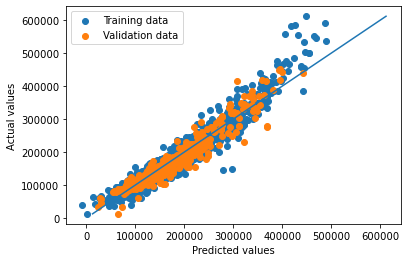

In [100]:
reg_plots(lassoCV, X_train_scaled, y_train, X_test_scaled, y_test)

### Observations

This model shows marginal improvement over the previous Lasso models. It has the highest R2 and cross_val scores, and the lowest mean absolute error and root mean squared error of any of the models tested.  I will use this for my submission to kaggle

### Setting up Kaggle submission

In [101]:
y_preds = lassoCV.predict(test_df_scaled)
test_df['saleprice']=y_preds

submission = test_df[['saleprice']]
submission.reset_index(inplace=True)
submission['id'] = submission['id'].astype(int)

submission.to_csv('../datasets/kaggle_submission.csv', index = False)

In [102]:
submission

,id,saleprice
0,2658,139816.824264
1,2718,163117.464283
2,2414,229165.534826
3,1989,112464.909184
4,625,178842.647899
...,...,...
873,1662,202943.218891
874,1234,226009.926792
875,1373,128582.146292
876,1672,109056.187112
